In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/CMP7206-Data Mining/Final.csv'
dataset = pd.read_csv(file_path)
dataset

,tweet_text,age,ethnicity,gender,religion,other_cyberbullying,not_cyberbullying,sexism,processed_tweet
0,"In other words #katandandre, your food was cra...",0,0,0,0,0,1,0,"['words', 'food', 'crapilicious']"
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,0,0,0,0,1,0,['white']
2,@XochitlSuckkks a classy whore? Or more red ve...,0,0,0,0,0,1,0,"['classy', 'whore', 'red', 'velvet', 'cupcakes']"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,0,0,0,0,1,0,"['meh', 'p', 'thanks', 'heads', 'concerned', '..."
4,@RudhoeEnglish This is an ISIS account pretend...,0,0,0,0,0,1,0,"['isis', 'account', 'pretending', 'kurdish', '..."
...,...,...,...,...,...,...,...,...,...
48279,"Kat is ruthless tonight. Look out, she's a des...",0,0,0,0,0,0,1,"['kat', 'ruthless', 'tonight', 'look', 'shes',..."
48280,mmmm Good luck @LisaMRomano 😄 let us know how ...,0,0,0,0,0,0,1,"['mmmm', 'good', 'luck', 'let', 'us', 'know', ..."
48281,RT @The_Loki_Jotunn: #WomenAgainstFeminism #Ad...,0,0,0,0,0,0,1,"['retweet', 'beyond', 'time', 'feminism', 'ack..."
48282,@Dreysander1 The college tribunals only apply ...,0,0,0,0,0,0,1,"['college', 'tribunals', 'apply', 'attend', 's..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the processed tweet texts using TF-IDF with a reduced number of features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(dataset['processed_tweet'].apply(lambda x: ' '.join(eval(x))))

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Show the first few rows of the TF-IDF DataFrame
tfidf_df.head()


,able,abortion,absolutely,abt,abuse,accept,account,act,acting,actions,...,yeah,year,years,yes,yet,yo,youll,young,youre,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.784892,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


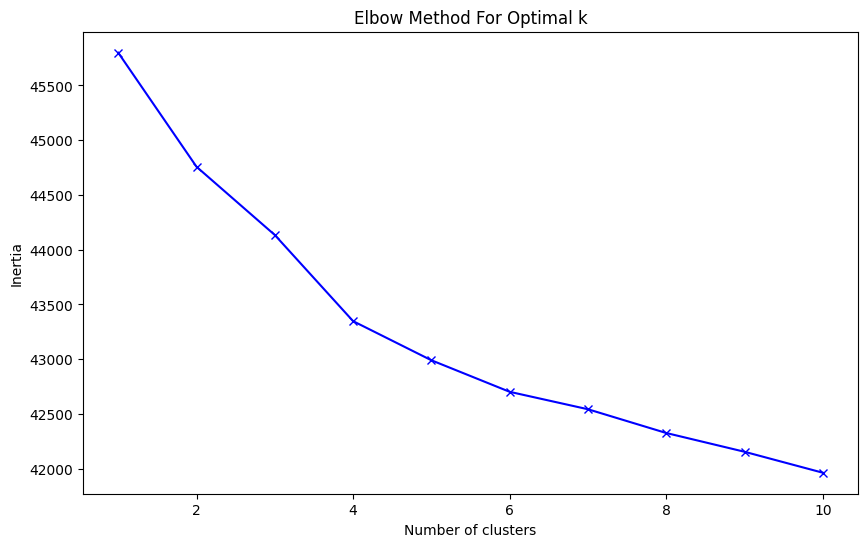

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original dataset
dataset['cluster'] = clusters

# Show the first few rows of the dataset with the cluster labels
dataset.head()


,tweet_text,age,ethnicity,gender,religion,other_cyberbullying,not_cyberbullying,sexism,processed_tweet,cluster
0,"In other words #katandandre, your food was cra...",0,0,0,0,0,1,0,"['words', 'food', 'crapilicious']",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,0,0,0,0,1,0,['white'],0
2,@XochitlSuckkks a classy whore? Or more red ve...,0,0,0,0,0,1,0,"['classy', 'whore', 'red', 'velvet', 'cupcakes']",0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,0,0,0,0,1,0,"['meh', 'p', 'thanks', 'heads', 'concerned', '...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0,0,0,0,0,1,0,"['isis', 'account', 'pretending', 'kurdish', '...",0


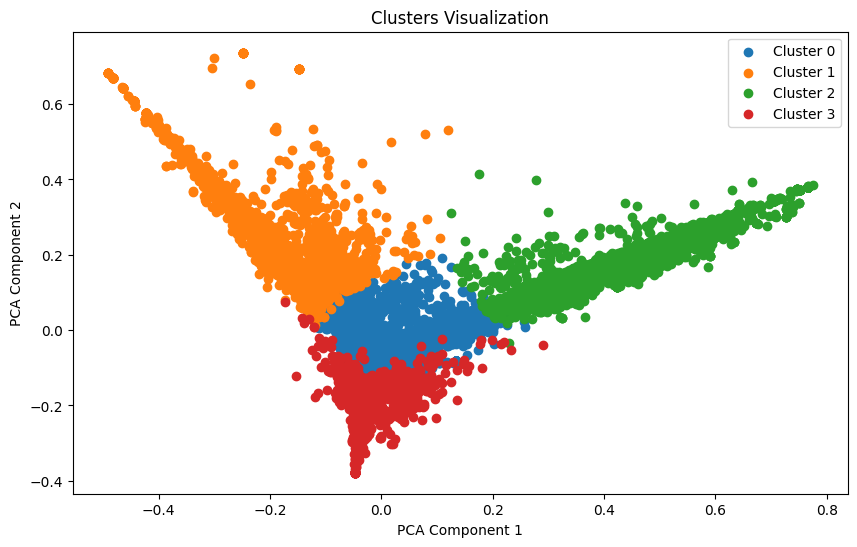

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the dimensions to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(4):
    plt.scatter(X_pca[dataset['cluster'] == cluster, 0],
                X_pca[dataset['cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization')
plt.legend()
plt.show()


In [ ]:
# Function to print sample tweets from each cluster
def print_cluster_samples(cluster_number):
    print(f"\nCluster {cluster_number} Sample Tweets:")
    cluster_samples = dataset[dataset['cluster'] == cluster_number]['tweet_text'].sample(5, random_state=42)
    for tweet in cluster_samples:
        print(f"- {tweet}")

# Print sample tweets from each cluster
for cluster_num in range(4):
    print_cluster_samples(cluster_num)



Cluster 0 Sample Tweets:
- @gen_rai Who is blaming these innocents? Who said all men have raped, all uncles are creepy, all teachers grope students? #BlameOneNotAll
- This is a good Christian woman who claims to part of the religious right but yet puts out false statements and claims our lord and savior says this my grandma God rest her soul is false hood and use of gods word is sinful
- @sschinke honestly? i forgot his name. :P doesn't really matter. i'm working with real data scientists.
- @mirebotan84 @RamiAlLolah Considering what those "local Arabs" did to Kurds, Christians, Assyrians, Ezidiz, etc., who cares.
- Runway lessons #MKR

Cluster 1 Sample Tweets:
- High school was... Something. I got bullied in my first year, I got to experience what it was like to have a boyfriend, and it was the time where I came to realization that I don't only like boys, I also like girls.
- Sophomore June could solve this murder if she wasn’t getting shut out of libraries, or chased by wild animals

In [ ]:
from sklearn.decomposition import PCA

# Reduce the dimensions to 3D using PCA
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X.toarray())


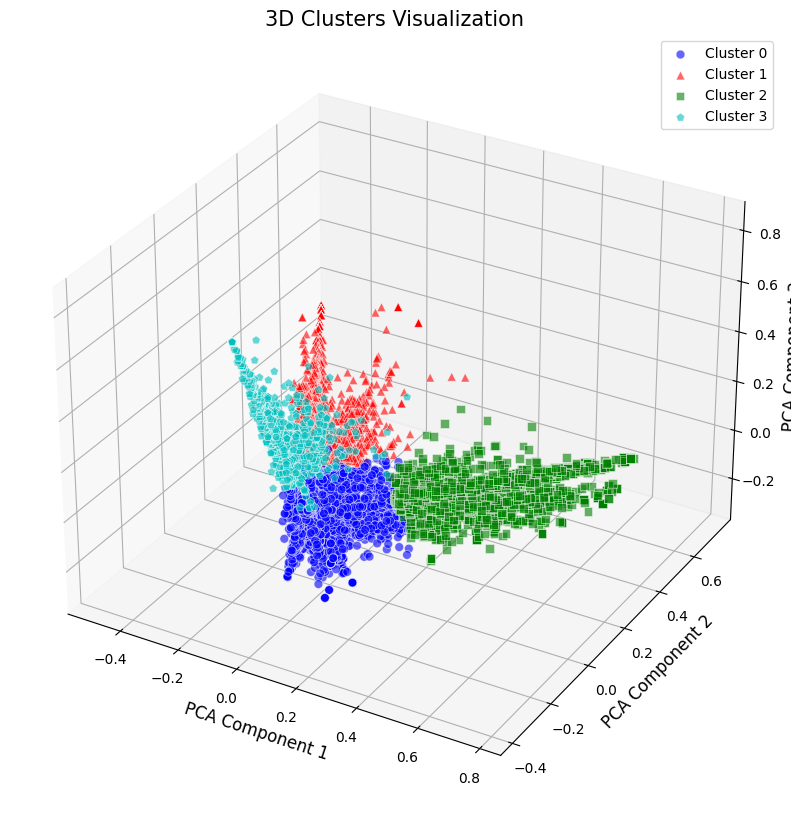

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(17, 10))
ax = fig.add_subplot(111, projection='3d')

# Define colors and markers for the clusters
colors = ['b', 'r', 'g', 'c']
markers = ['o', '^', 's', 'p']

for cluster in range(4):
    points = X_pca_3d[dataset['cluster'] == cluster]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2],
               c=colors[cluster], label=f'Cluster {cluster}',
               s=40, marker=markers[cluster], alpha=0.6, edgecolors='w', linewidth=0.5)

ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)
ax.set_zlabel('PCA Component 3', fontsize=12)
ax.set_title('3D Clusters Visualization', fontsize=15)
ax.legend(fontsize=10)
plt.show()


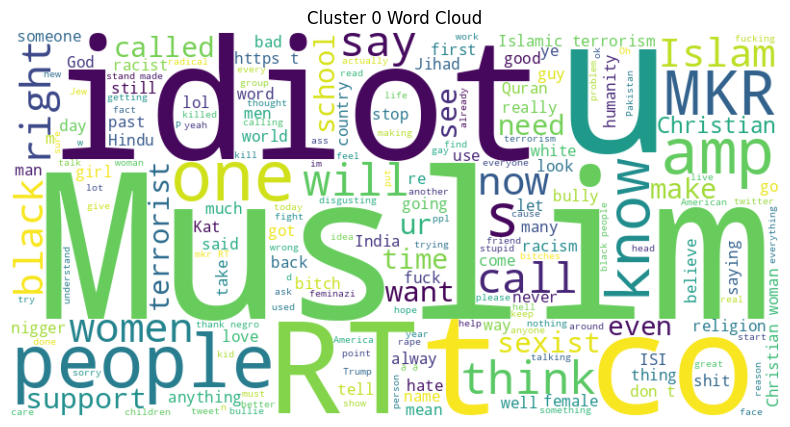

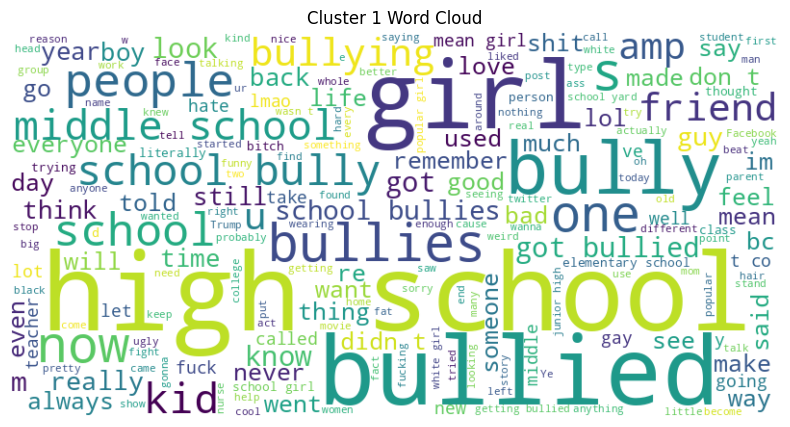

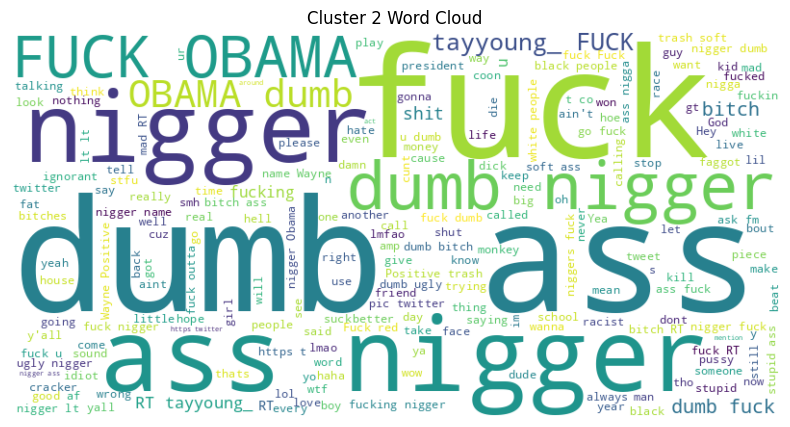

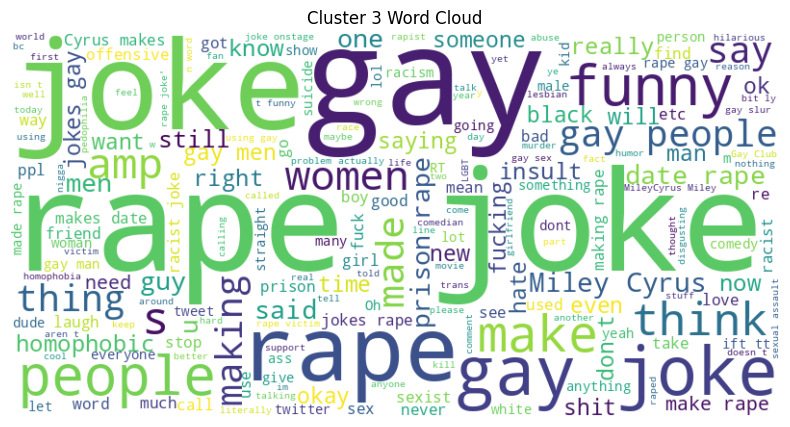

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for each cluster
def plot_word_cloud(cluster_number):
    cluster_text = ' '.join(dataset[dataset['cluster'] == cluster_number]['tweet_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {cluster_number} Word Cloud')
    plt.axis('off')
    plt.show()

# Generate word cloud for each cluster
for cluster_num in range(4):
    plot_word_cloud(cluster_num)


In [ ]:
import numpy as np
import pandas as pd

# Assuming you have the following:
# X - your TF-IDF matrix (as a sparse matrix)
# kmeans - your fitted KMeans model
# vectorizer - the TfidfVectorizer used to transform the text data

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the feature names (words)
terms = vectorizer.get_feature_names_out()

# For each cluster, find the top N features
top_n = 10  # Number of top words to display per cluster
top_features_df = pd.DataFrame()

for i in range(centroids.shape[0]):
    # Sort features by importance in the cluster centroid
    top_indices = centroids[i].argsort()[-top_n:][::-1]
    top_features = [(terms[ind], centroids[i][ind]) for ind in top_indices]
    top_features_df[f'Cluster {i}'] = pd.Series([word for word, weight in top_features])

# Display the top features for each cluster
print("Top features for each cluster:")
print(top_features_df)


Top features for each cluster:
  Cluster 0 Cluster 1 Cluster 2 Cluster 3
0   retweet     bully      fuck      joke
1    muslim    school      dumb      rape
2     idiot      high    nigger       gay
3        im      girl       ass     funny
4      like      like     obama    people
5      dont    middle   retweet      make
6    people       got     bitch    making
7       one        im      shit     makes
8       get       one       mad    prison
9      know     would       get      made


In [ ]:
from sklearn.metrics import silhouette_score

# Fit the K-means model
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original dataset
dataset['cluster'] = clusters

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, clusters)
print(f"The average silhouette score is: {silhouette_avg}")

# Show the first few rows of the dataset with the cluster labels
dataset.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The average silhouette score is: 0.03410234642842748


,tweet_text,age,ethnicity,gender,religion,other_cyberbullying,not_cyberbullying,sexism,processed_tweet,cluster
0,"In other words #katandandre, your food was cra...",0,0,0,0,0,1,0,"['words', 'food', 'crapilicious']",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,0,0,0,0,1,0,['white'],0
2,@XochitlSuckkks a classy whore? Or more red ve...,0,0,0,0,0,1,0,"['classy', 'whore', 'red', 'velvet', 'cupcakes']",0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,0,0,0,0,1,0,"['meh', 'p', 'thanks', 'heads', 'concerned', '...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0,0,0,0,0,1,0,"['isis', 'account', 'pretending', 'kurdish', '...",0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The average silhouette score is: 0.03410234642842748


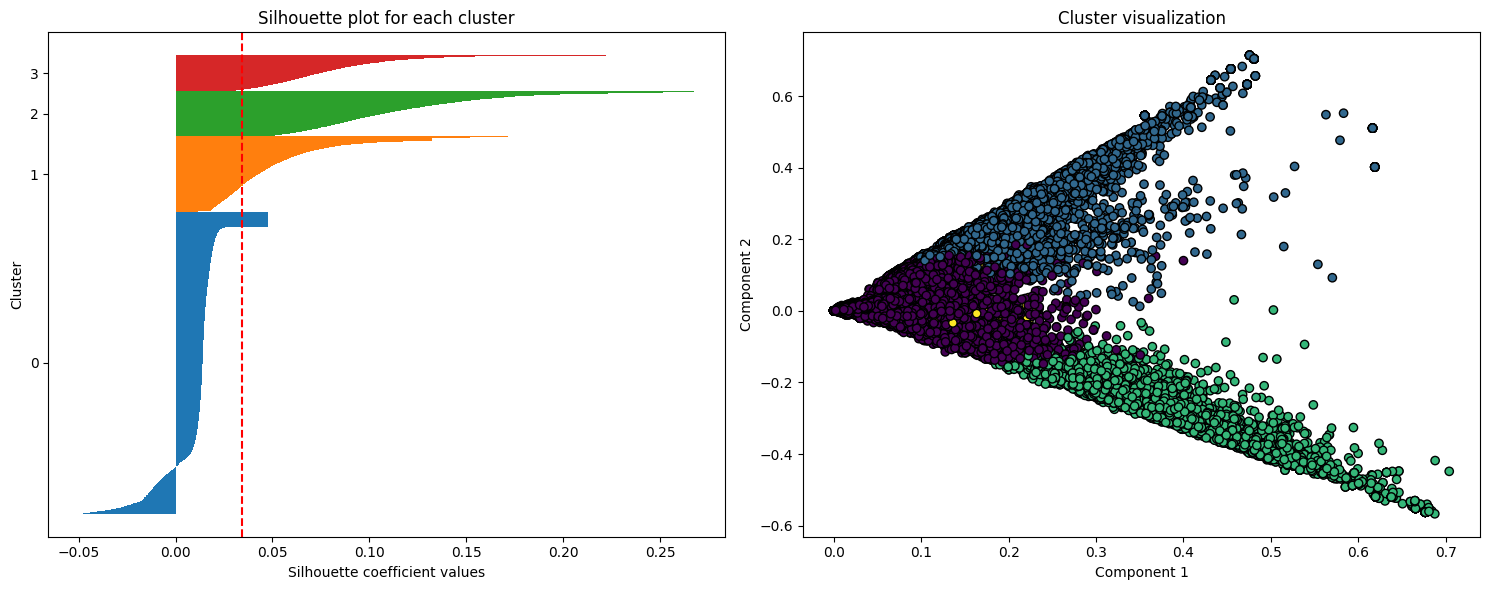

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

# Fit the K-means model
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original dataset
dataset['cluster'] = clusters

# Calculate the average silhouette score
silhouette_avg = silhouette_score(X, clusters)
print(f"The average silhouette score is: {silhouette_avg}")

# Silhouette plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Silhouette plot
silhouette_vals = silhouette_samples(X, clusters)
y_ticks = []
y_lower, y_upper = 0, 0

for i, cluster in enumerate(np.unique(clusters)):
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(np.unique(clusters))
ax1.set_ylabel('Cluster')
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_title('Silhouette plot for each cluster')

# 2. Scatter plot with clusters using TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black')
ax2.set_title('Cluster visualization')
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')

plt.tight_layout()
plt.show()
